<a href="https://colab.research.google.com/github/LennyRBriones/neural-networks-practices/blob/main/brain_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

local_zip = "/tmp/brain_class.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/brain_class")
zip_ref.close()

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "/tmp/brain_class/Training"
test_dir = "/tmp/brain_class/Testing"

## Data Generators

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2) #split in 20% to validate the performance

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
)


Found 5712 images belonging to 4 classes.
Found 262 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
classes = ["glioma","meningioma", "notumor", "pituitary"]

In [7]:
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [8]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize =(10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

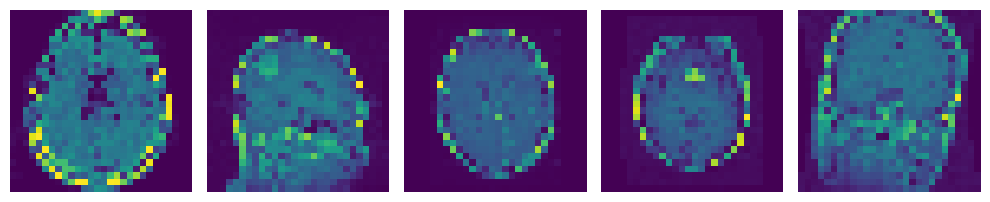

In [9]:
sample_training_images, _ = next(train_generator)
plotimages(sample_training_images[:5])

In [10]:
base_model = tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
                                        tf.keras.layers.Dense(56, activation = "relu"),
                                        tf.keras.layers.Dense(28, activation = "relu"),
                                        tf.keras.layers.Dense(len(classes), activation ="softmax")
])

In [11]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 28)                1596      
                                                                 
 dense_2 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trainable params: 0
_________________________________________________________________


In [12]:
base_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = base_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator

)


Epoch 1/10
204/204 [==============================] - 23s 102ms/step - loss: 0.9358 - accuracy: 0.6092 - val_loss: 1.1826 - val_accuracy: 0.6450
Epoch 2/10
204/204 [==============================] - 19s 93ms/step - loss: 0.6534 - accuracy: 0.7570 - val_loss: 0.8247 - val_accuracy: 0.7023
Epoch 3/10
204/204 [==============================] - 19s 91ms/step - loss: 0.5368 - accuracy: 0.8057 - val_loss: 0.8065 - val_accuracy: 0.7252
Epoch 4/10
204/204 [==============================] - 18s 89ms/step - loss: 0.4642 - accuracy: 0.8363 - val_loss: 0.8046 - val_accuracy: 0.7328
Epoch 5/10
204/204 [==============================] - 19s 92ms/step - loss: 0.4187 - accuracy: 0.8493 - val_loss: 0.5940 - val_accuracy: 0.8168
Epoch 6/10
204/204 [==============================] - 20s 98ms/step - loss: 0.3656 - accuracy: 0.8682 - val_loss: 0.7412 - val_accuracy: 0.7824
Epoch 7/10
204/204 [==============================] - 19s 91ms/step - loss: 0.3239 - accuracy: 0.8815 - val_loss: 0.5297 - val_accuracy

In [13]:
results = base_model.evaluate(test_generator)

47/47 [==============================] - 4s 81ms/step - loss: 0.4619 - accuracy: 0.8215


In [14]:
def visualization_results(history):
  epochs = [i for i in range(10)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label ="training accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label ="validation accuracy")
  ax[0].set_title("Training & validation accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label ="training loss")
  ax[1].plot(epochs, val_loss, "ro-", label ="validation loss")
  ax[1].set_title("Training & validation loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("loss")

  plt.show()

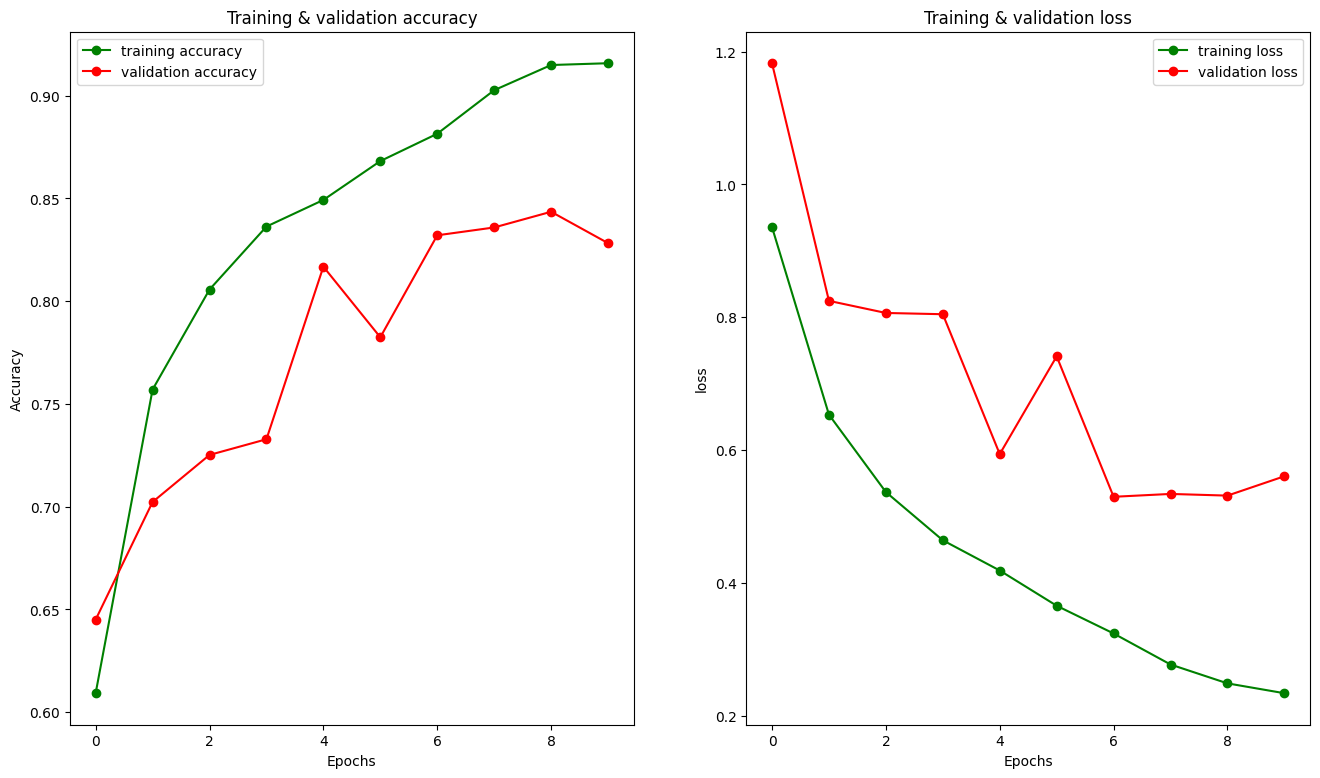

In [15]:
visualization_results(history)

In [16]:
from tensorflow.keras import regularizers

In [17]:
optimized_model = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

optimized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 56)                43960     
                                                                 
 dropout (Dropout)           (None, 56)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                1596      
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trai

In [18]:
optimized_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = optimized_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 20s 93ms/step - loss: 1.0808 - accuracy: 0.5121 - val_loss: 1.1483 - val_accuracy: 0.5763
Epoch 2/10
204/204 [==============================] - 19s 93ms/step - loss: 0.8202 - accuracy: 0.6765 - val_loss: 0.9846 - val_accuracy: 0.6756
Epoch 3/10
204/204 [==============================] - 19s 92ms/step - loss: 0.7039 - accuracy: 0.7190 - val_loss: 0.9036 - val_accuracy: 0.7137
Epoch 4/10
204/204 [==============================] - 19s 91ms/step - loss: 0.6297 - accuracy: 0.7505 - val_loss: 0.8540 - val_accuracy: 0.7176
Epoch 5/10
204/204 [==============================] - 20s 99ms/step - loss: 0.5665 - accuracy: 0.7866 - val_loss: 0.8044 - val_accuracy: 0.7405
Epoch 6/10
204/204 [==============================] - 18s 88ms/step - loss: 0.5277 - accuracy: 0.7995 - val_loss: 0.8064 - val_accuracy: 0.7176
Epoch 7/10
204/204 [==============================] - 19s 91ms/step - loss: 0.4910 - accuracy: 0.8174 - val_loss: 0.7361 - val_accuracy:

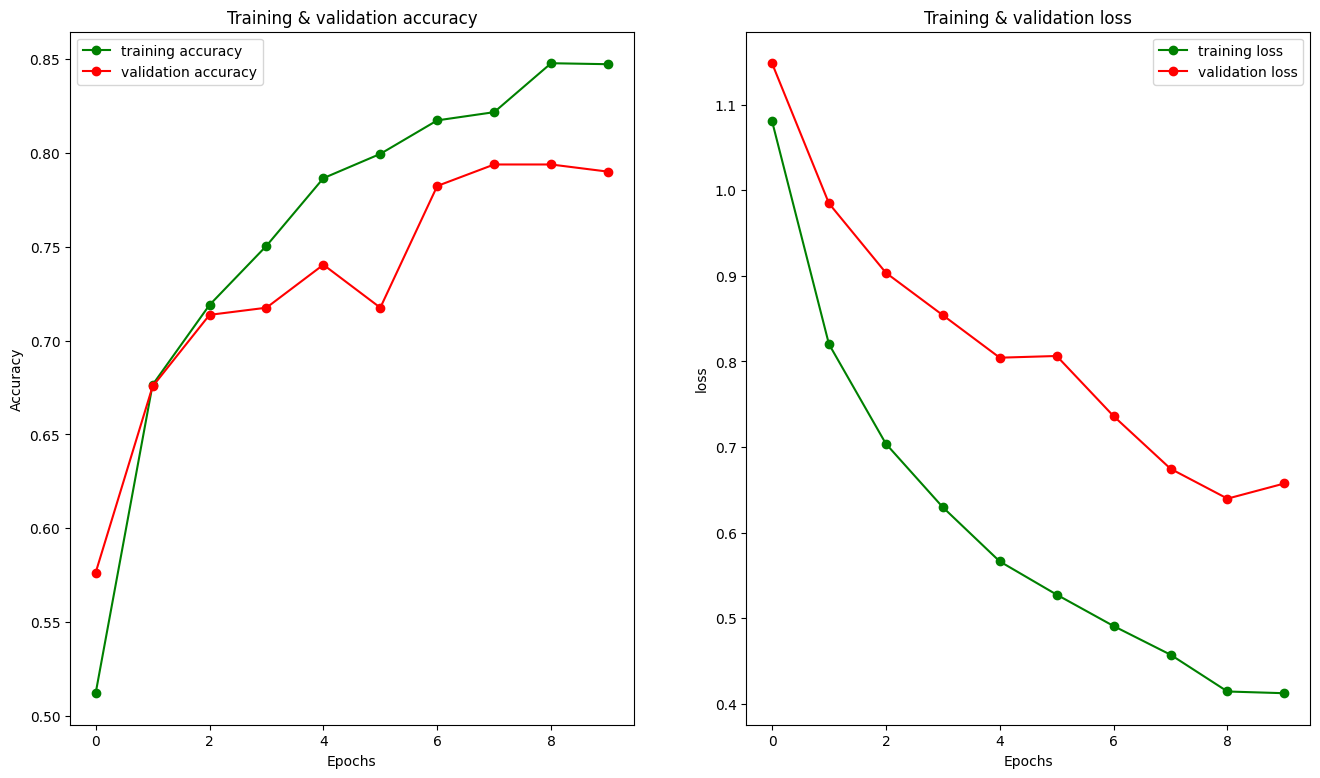

In [19]:
visualization_results(history_optimizer)

In [20]:
convolutional_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

convolutional_model.summary()

convolutional_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = convolutional_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 8450)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                473256    
                                                                 
 dropout_2 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

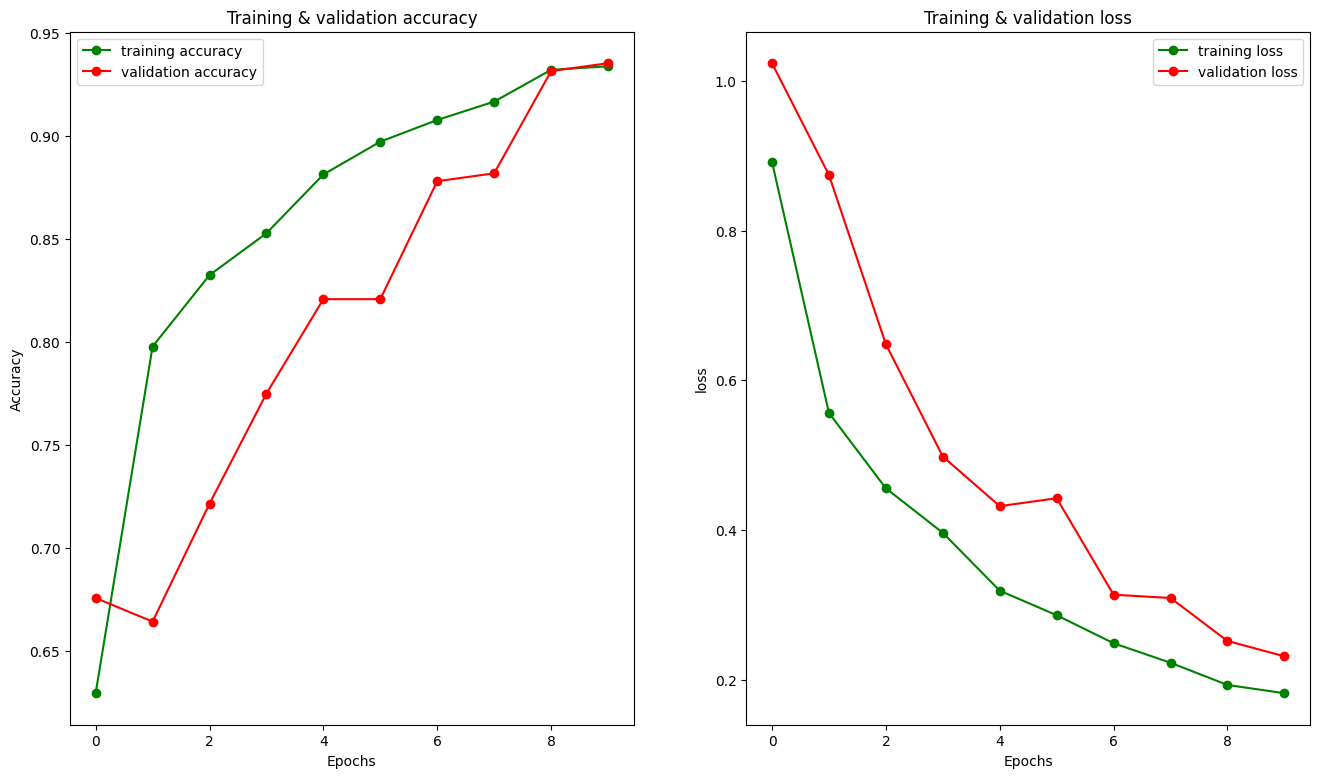

In [21]:
visualization_results(history_convolutional)

## Using Callbacks

In [33]:
callback_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

callback_model.summary()

callback_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 50)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 8450)              0         
                                                                 
 dense_18 (Dense)            (None, 56)                473256    
                                                                 
 dropout_10 (Dropout)        (None, 56)                0         
                                                                 
 dense_19 (Dense)            (None, 28)                1596      
                                                      

In [36]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Done, the model gets 95%, stopping training")
      self.model.stop_training = True

In [35]:
callback = TrainingCallback()

history_callback = callback_model.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
204/204 [==============================] - 27s 126ms/step - loss: 0.8892 - accuracy: 0.6331 - val_loss: 0.8077 - val_accuracy: 0.7023
Epoch 2/20
204/204 [==============================] - 23s 112ms/step - loss: 0.5868 - accuracy: 0.7759 - val_loss: 0.7216 - val_accuracy: 0.6832
Epoch 3/20
204/204 [==============================] - 22s 107ms/step - loss: 0.4837 - accuracy: 0.8100 - val_loss: 0.5766 - val_accuracy: 0.7557
Epoch 4/20
204/204 [==============================] - 23s 113ms/step - loss: 0.4065 - accuracy: 0.8494 - val_loss: 0.5364 - val_accuracy: 0.7672
Epoch 5/20
204/204 [==============================] - 23s 114ms/step - loss: 0.3485 - accuracy: 0.8682 - val_loss: 0.4456 - val_accuracy: 0.7977
Epoch 6/20
204/204 [==============================] - 21s 102ms/step - loss: 0.3155 - accuracy: 0.8813 - val_loss: 0.4027 - val_accuracy: 0.8321
Epoch 7/20
204/204 [==============================] - 23s 113ms/step - loss: 0.2699 - accuracy: 0.9011 - val_loss: 0.3178 - val_ac